### Introduction 
#### Insights to home owners on how to increase their home value in Kings County.

### Library Imports

In [4]:
#imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

#### Load the Kings County Housing Dataset.

In [5]:
# Load the data into a dataframe and read the first five rows
df = pd.read_csv('../data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


#### Column/Feature Description

In [6]:
# Read the columns in the dataset
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# Column Names and descriptions for Kings County Data Set
* **id** - unique identity for a house
* **date** - Date house was sold
* **price** -  Price prediction target
* **bedrooms** - Number of Bedrooms/House
* **bathrooms** - Number of bathrooms/bedrooms
* **sqft_living** - square footage of the home
* **sqft_lot** - square footage of the lot
* **floors** - Total floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

### Exploratory Data Analysis

In [7]:
# Gets the number of rows and columns in the KC dataset
df.shape

(21597, 21)

Dataset has 21597 rows and 21 columns

Gives a description of the numeric columns in the dataset.

In [8]:
# Numeric description of the columns
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Check the data type held by each column and number of non-null values

In [9]:
# Check the data type held by each column and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Check the null values in each column

In [10]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Waterfront has 2376 null values, Year Renovated has 3842 and view column has 63 null values.

Address the null values in yr_renovated column.

In [11]:
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

78% (17011) of the houses in Kings County have not been renovated, I'll replace the null values with zero for this column.

In [12]:
# Replace the null values in the yr_renovated column with 0.00, which is the mode.
df['yr_renovated'] = df['yr_renovated'].fillna(0.00)
df['yr_renovated'].isna().sum()

0

Check the distribution of values in the waterfront and view columns.

In [13]:
df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [14]:
df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

Given that a significant percentage of the values in both columns is 0, the best replacement for the null values would be the mode.

In [15]:
# Replaces null values with the column mode
df['waterfront'] = df['waterfront'].fillna(df['waterfront'].mode()[0])
df['view'] = df['view'].fillna(df['view'].mode()[0])

In [16]:
# Check for null values
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no null values in the dataset.

##### Convert all non-numeric data values to numeric values for analysis.

The date column contains values of type string. Before any numerical analysis, this should be converted to a numerical data type

In [17]:
# This converts the date column from string type to numerical type, which is the year the house was sold.
df['date'] = pd.to_datetime(df['date']).dt.year

In [18]:
df = df.apply(pd.to_numeric, errors='coerce')
# This check for non-numeric values in the dataset and converts them to null values
df.isna().sum()
# Check the dataset for null values after conversion.

id                 0
date               0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above         0
sqft_basement    454
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
sqft_living15      0
sqft_lot15         0
dtype: int64

c:\Users\JTG\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\Users\JTG\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


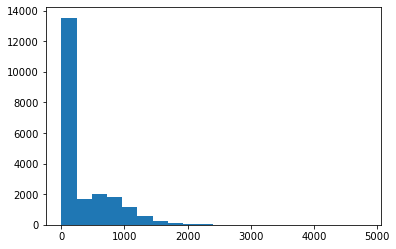

count    21143.000000
mean       291.851724
std        442.498337
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

In [19]:
plt.hist(df['sqft_basement'], bins=20)
# Check the data distribution in the sqft_basement column to decide on the best value to replace the null values
plt.show()
df['sqft_basement'].describe()

Since the data in the column is heavily skewed, it would be prudent to replace the null values with the mode.

In [20]:
df['sqft_basement'] = df['sqft_basement'].fillna(df['sqft_basement'].mode()[0])
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Feature Selection

AttributeError: 'PairGrid' object has no attribute 'figure'

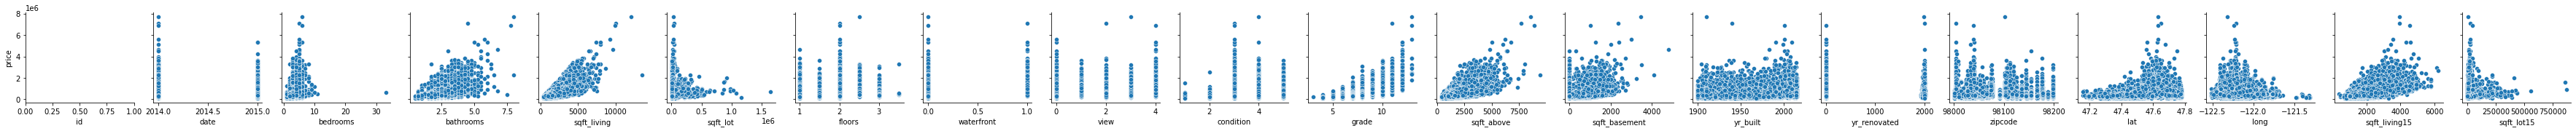

In [21]:
# 
pairplot = sns.pairplot(data=df, y_vars=['price'], x_vars=[column for column in df.columns if column!= 'price'])
pairplot.figure.set_size_inches(50,5)
plt.show()

For feature selection, we'll identify the independent variables that most affect our dependent variable, which is the price column, using a seaborn heatmap.

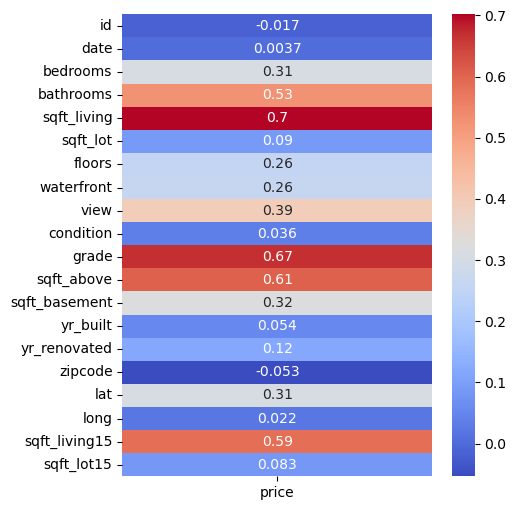

In [ ]:
# Creates a seaborn heatmap that shows the correlation between the dependent variable(price) and the other independent variables
plt.figure(figsize=(5, 6))
sns.heatmap(df.corr()[[column for column in df.columns if column== 'price']].drop(['price']), annot=True, cmap='coolwarm')
plt.show()

**The most impactful features to the house price are square footage of the home(sqft_living), overall grade given to the housing unit, based on King County grading system(grade), square footage of the house apart from the basement(sqft_above) and The square footage of interior housing living space for the nearest 15 neighbors(sqft_living15)**

In [ ]:
df[['yr_renovated', 'yr_built', 'date']]

,yr_renovated,yr_built,date
0,0.0,1955,2014
1,1991.0,1951,2014
2,0.0,1933,2015
3,0.0,1965,2014
4,0.0,1987,2015
...,...,...,...
21592,0.0,2009,2014
21593,0.0,2014,2015
21594,0.0,2009,2014
21595,0.0,2004,2015


In [ ]:
df['date'].value_counts()

date
2014    14622
2015     6975
Name: count, dtype: int64